# Model Regression

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Maisons  = pd.read_csv('Maisons.csv')
Maisons.head()

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population,Prix,Adresse
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
Maisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Revenu_moyen       5000 non-null   float64
 1   Age_moyen          5000 non-null   float64
 2   Nb_moyen_pieces    5000 non-null   float64
 3   Nb_moyen_chambres  5000 non-null   float64
 4   Population         5000 non-null   float64
 5   Prix               5000 non-null   float64
 6   Adresse            5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
Maisons.describe()

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population,Prix
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


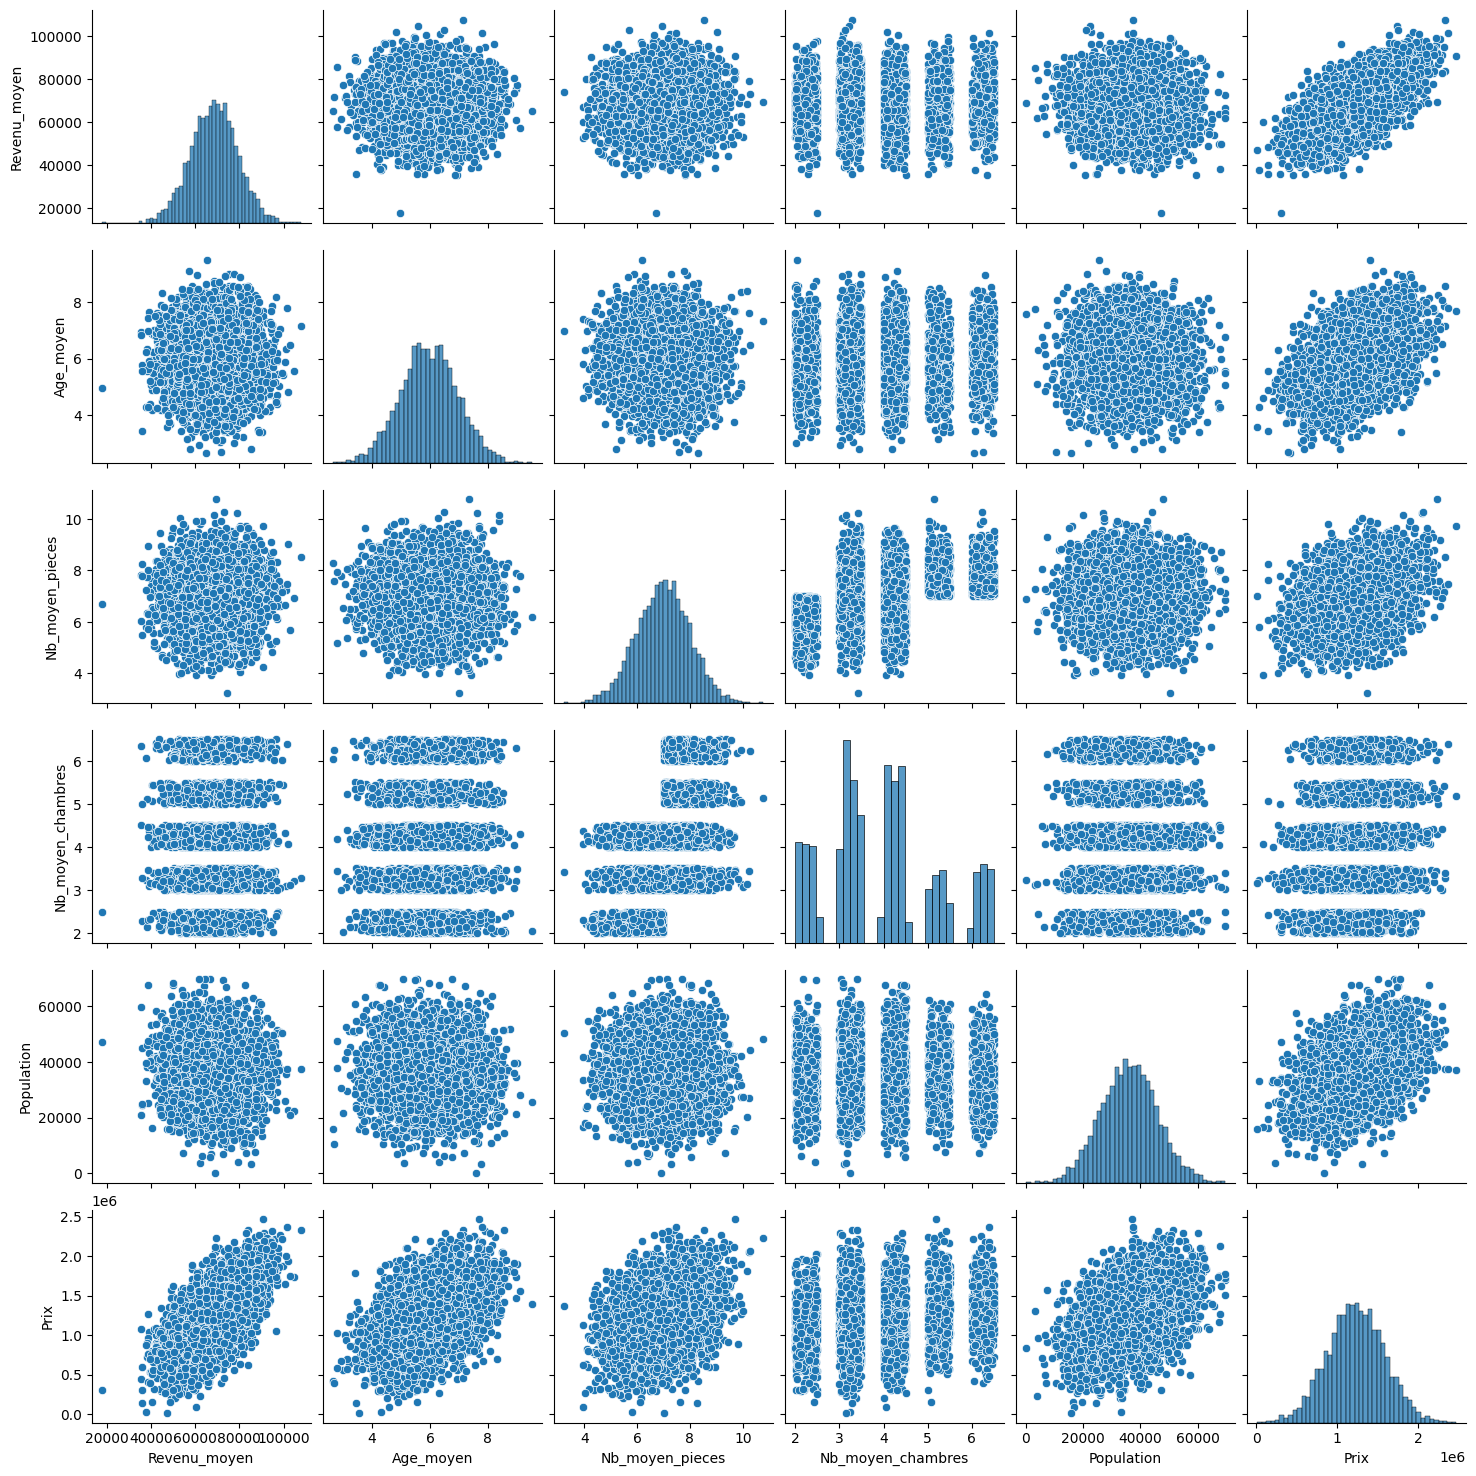

In [6]:
sns.pairplot(Maisons)

Text(0.5, 1.0, 'Correlation Matrix')

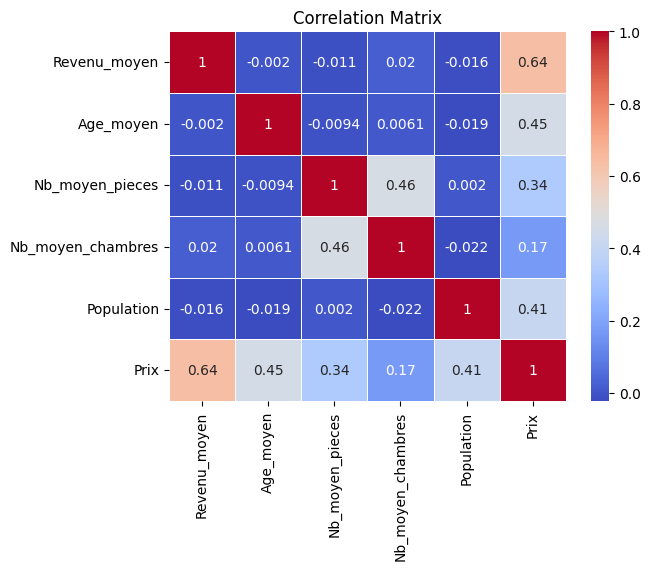

In [24]:
Numeric_data = Maisons.drop("Adresse", axis=1)
corr_matrix = Numeric_data.corr()   
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)    
plt.title('Correlation Matrix')

Text(0.5, 1.02, 'Relation entre le Revenu moyen et le Prix')

<Figure size 800x800 with 0 Axes>

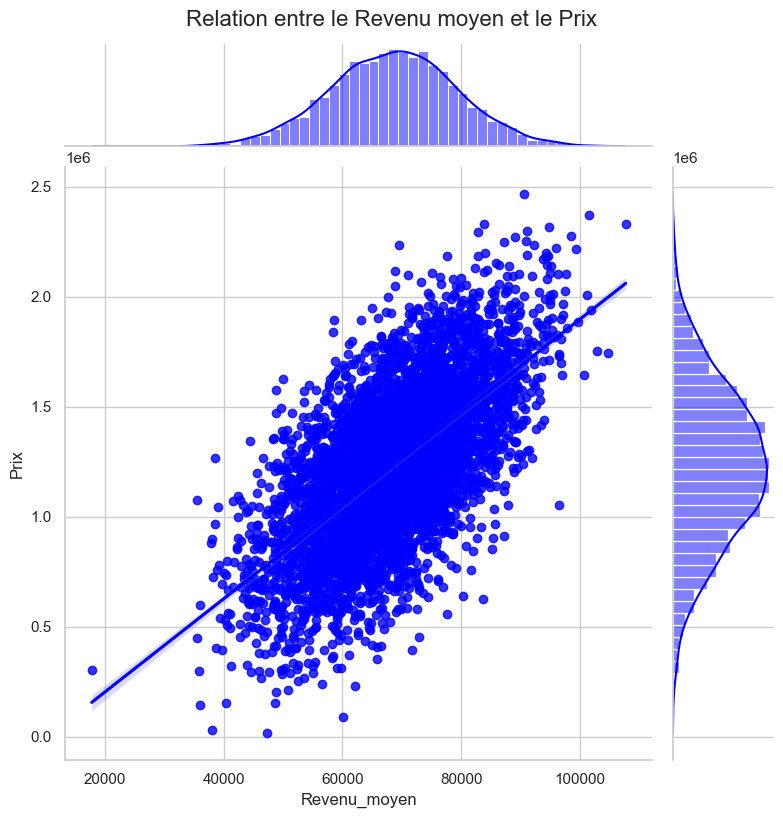

In [25]:
sns.set(style="whitegrid")  # Style plus clair
plt.figure(figsize=(8, 8))  # Ajuster la taille du graphique

# Tracer le jointplot avec des réglages améliorés
sns.jointplot(x='Revenu_moyen', y='Prix', data=Maisons, kind='reg', color='blue', height=8)
plt.suptitle("Relation entre le Revenu moyen et le Prix", y=1.02, fontsize=16)

# Validation du model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE: 10337337828.267818
MAE: 81563.14733994487
RMSE: 101672.69952287004
R^2: 0.9200757649412041


Text(0.5, 1.0, 'Graphique des résidus')

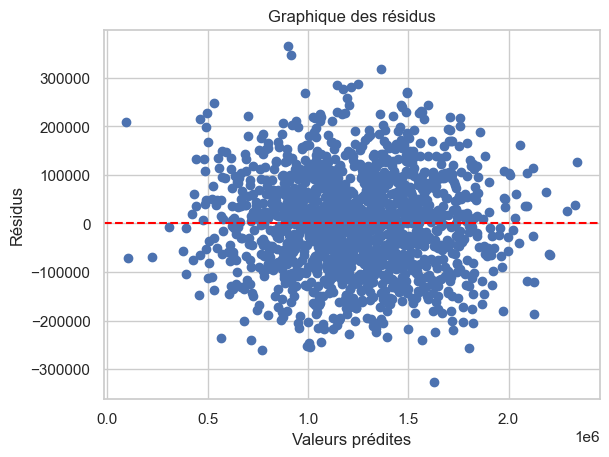

In [36]:
# Extraire les variables 'Revenu_moyen' et 'Prix'
X = Maisons.drop(['Adresse', 'Prix'], axis=1)
y = Maisons['Prix']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

# Effectuer des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)


residuals = y_test - y_pred
# Graphique des résidus
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Graphique des résidus")


Text(0.5, 0, 'Résidus')

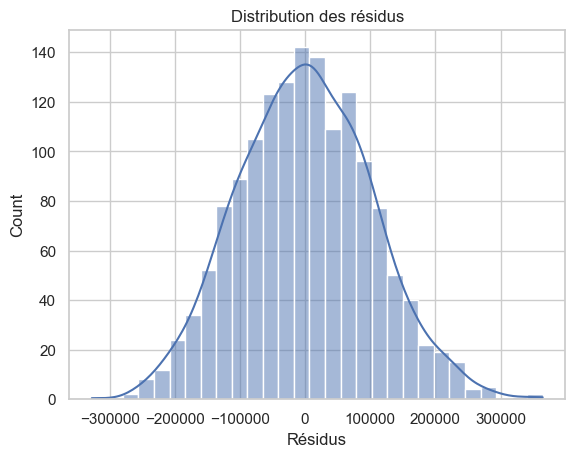

In [33]:
# Visualisation de la distribution des résidus
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Résidus")

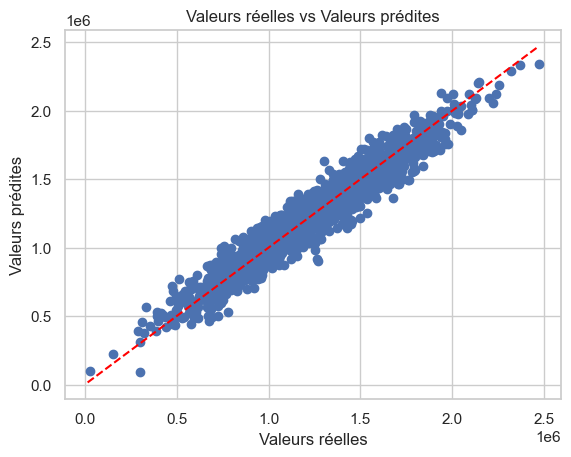

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs réelles vs Valeurs prédites")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Ligne de référence

In [39]:
import statsmodels.formula.api as smf
reg_linear = smf.ols('Prix ~ Revenu_moyen + Age_moyen + Nb_moyen_pieces + Nb_moyen_chambres + Population', data=Maisons).fit()
print(reg_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:15:40   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.637e+06   1.72e+0

In [ ]:
# Conclusion on remarque que le p-value de Nb-moyen-chambres est supérieur à 0.05, donc on peut le retirer du modèle
# Car l'hypothese H0 est que le coefficient est nul, donc il n'a pas d'effet sur le prix
# p-value est la probabilité de rejeter l'hypothèse nulle alors qu'elle est vraie
# p-value est faible inferieur à 0.05 c'est à dire lorsqu'on rejette H0 on'a peu de rsique de se tromper